In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/japanese-housing-prices-2005-2024/All_prefectures_buildings_with_migration.csv
/kaggle/input/japanese-housing-prices-2005-2024/All_prefectures_buildings.csv


# 🏡 Japanese Housing Trends (2005–2024) | Migration & Price


In [37]:
#This project explores Japanese housing data from 2005 to 2024 to understand how migration patterns and housing prices have changed over time.

# 📌 Key Objectives:
# - Analyze how internal migration varies across prefectures.
# - Examine trends in building area, transaction value, and price per sqm.
# - Visualize correlations between migration, housing size, and transaction value.
# - Identify which prefectures are growing or declining in population attraction.

# By combining visual analytics and data storytelling, this notebook provides insights that can help policymakers, real estate investors, and researchers understand Japan's evolving housing landscape.


In [38]:

from IPython.display import display, Markdown

# 🧱 Raw Inputs: Housing & Migration

In [39]:
# This project uses two key datasets:

# 1. **🏠 Buildings Data** — Housing transactions: area, price, building type, etc.  
# 2. **🚶‍♂️ Migration Data** — Population movement across Japan's prefectures.

# Let’s explore the structure and quality of these datasets.


In [40]:
   # Load Japanese housing datasets
df_buildings = pd.read_csv('/kaggle/input/japanese-housing-prices-2005-2024/All_prefectures_buildings.csv')
df_migration = pd.read_csv('/kaggle/input/japanese-housing-prices-2005-2024/All_prefectures_buildings_with_migration.csv')

# Display preview of loaded data
display(Markdown("### 🏠 Buildings Data – Top 2 Rows"))
display(df_buildings.head(2))

display(Markdown("### 🚚 Migration-Adjusted Buildings Data – Top 2 Rows"))
display(df_migration.head(2))


### 🏠 Buildings Data – Top 2 Rows

,Type,Prefecture,Location,TotalTransactionValue,Area,Frontage,TotalFloorArea,ConstructionYear,BuildingCoverageRatio,FloorAreaRatio,...,BeforeWarFlag,frontage_greater_than_50,AreaGreaterFlag,Region_Chugoku,Region_Hokkaido,Region_Kansai,Region_Kanto,Region_Kyushu,Region_Shikoku,Region_Tohoku
0,Residential Land(Land and Building),Nagano Prefecture,Nagano City,27000000,175,9.0,100,2024,60.0,200.0,...,False,False,False,False,False,False,False,False,False,False
1,Residential Land(Land and Building),Nagano Prefecture,Nagano City,27000000,125,9.0,100,2019,60.0,200.0,...,False,False,False,False,False,False,False,False,False,False


### 🚚 Migration-Adjusted Buildings Data – Top 2 Rows

,Type,"City,Town,Ward,Village code",Prefecture,Location,TotalTransactionValue,Area,Frontage,TotalFloorArea,ConstructionYear,BuildingCoverageRatio,...,frontage_greater_than_50,AreaGreaterFlag,Region_Chugoku,Region_Hokkaido,Region_Kansai,Region_Kanto,Region_Kyushu,Region_Shikoku,Region_Tohoku,Migration
0,Residential Land(Land and Building),20201,Nagano Prefecture,Nagano City,27000000,175,9.0,100,2024,60.0,...,False,False,False,False,False,False,False,False,False,20101.0
1,Residential Land(Land and Building),20201,Nagano Prefecture,Nagano City,27000000,125,9.0,100,2019,60.0,...,False,False,False,False,False,False,False,False,False,20376.0


## 🧹 Data Cleaning & Quality Checks

In [41]:
# Before diving into analysis, we’ll clean the data by:

# - Checking for missing values and duplicates
# - Ensuring correct data types
# - Getting the dataset ready for analysis

In [42]:
from IPython.display import display, Markdown

display(Markdown("### 🔍 Missing Values in Datasets"))

missing_buildings = df_buildings.isnull().sum()
missing_migration = df_migration.isnull().sum()

display(Markdown("#### 🏢 Buildings Dataset"))
display(missing_buildings[missing_buildings > 0].sort_values(ascending=False))

display(Markdown("#### 🧳 Migration Dataset"))
display(missing_migration[missing_migration > 0].sort_values(ascending=False))


### 🔍 Missing Values in Datasets

#### 🏢 Buildings Dataset

Series([], dtype: int64)

#### 🧳 Migration Dataset

Series([], dtype: int64)

In [43]:

total_buildings = len(df_buildings)
dup_buildings = df_buildings.duplicated().sum()

total_migration = len(df_migration)
dup_migration = df_migration.duplicated().sum()

from IPython.display import display, Markdown
display(Markdown(f"- 🏢 **Buildings Duplicates:** `{dup_buildings}` rows ({dup_buildings/total_buildings:.2%})"))
display(Markdown(f"- 🧳 **Migration Duplicates:** `{dup_migration}` rows ({dup_migration/total_migration:.2%})"))


- 🏢 **Buildings Duplicates:** `1639` rows (0.12%)

- 🧳 **Migration Duplicates:** `1639` rows (0.12%)

In [44]:
display(Markdown("#### 🏢 Buildings Dataset – Non-Numeric Columns"))
display(df_buildings.select_dtypes(include=['object']).dtypes)



#### 🏢 Buildings Dataset – Non-Numeric Columns

Type          object
Prefecture    object
Location      object
dtype: object

In [45]:
df_migration.columns.tolist()

['Type',
 'City,Town,Ward,Village code',
 'Prefecture',
 'Location',
 'TotalTransactionValue',
 'Area',
 'Frontage',
 'TotalFloorArea',
 'ConstructionYear',
 'BuildingCoverageRatio',
 'FloorAreaRatio',
 'Quarter',
 'Year',
 'RegionCommercialArea',
 'RegionIndustrialArea',
 'RegionPotentialResidentialArea',
 'RegionResidentialArea',
 'MunicipalityCategory',
 'Region_Chubu',
 'AverageTimeToStation',
 'FloorAreaGreaterFLag',
 'BeforeWarFlag',
 'frontage_greater_than_50',
 'AreaGreaterFlag',
 'Region_Chugoku',
 'Region_Hokkaido',
 'Region_Kansai',
 'Region_Kanto',
 'Region_Kyushu',
 'Region_Shikoku',
 'Region_Tohoku',
 'Migration']

In [46]:
from IPython.display import display, Markdown


cols_to_keep = [
    'Year',
    'Prefecture',
    'Location',
    'Area',
    'TotalTransactionValue',
    'ConstructionYear',
    'AverageTimeToStation',
    'Migration'
]

df = df_migration[cols_to_keep].copy()

display(Markdown("### 🧹 Selected Key Columns (Cleaned Data Preview)"))
display(df.head())


### 🧹 Selected Key Columns (Cleaned Data Preview)

,Year,Prefecture,Location,Area,TotalTransactionValue,ConstructionYear,AverageTimeToStation,Migration
0,2024,Nagano Prefecture,Nagano City,175,27000000,2024,45,20101.0
1,2023,Nagano Prefecture,Nagano City,125,27000000,2019,45,20376.0
2,2021,Nagano Prefecture,Nagano City,90,6500000,1996,45,20587.0
3,2021,Nagano Prefecture,Nagano City,135,27000000,2021,45,20587.0
4,2020,Nagano Prefecture,Nagano City,340,67000000,2020,45,22103.0


In [60]:
df.rename(columns={
    'TotalTransactionValue': 'total_transaction_value',
    'AverageTimeToStation': 'avg_time_to_station',
    'ConstructionYear': 'construction_year',
    'Migration': 'migration'
}, inplace=True)


In [61]:
df_cleaned = df.dropna(subset=['total_transaction_value', 'migration'])


In [49]:
df_cleaned = df_cleaned.drop_duplicates()
(df_cleaned.head())


,Year,Prefecture,Location,Area,total_transaction_value,construction_year,avg_time_to_station,migration
0,2024,Nagano Prefecture,Nagano City,175,27000000,2024,45,20101.0
1,2023,Nagano Prefecture,Nagano City,125,27000000,2019,45,20376.0
2,2021,Nagano Prefecture,Nagano City,90,6500000,1996,45,20587.0
3,2021,Nagano Prefecture,Nagano City,135,27000000,2021,45,20587.0
4,2020,Nagano Prefecture,Nagano City,340,67000000,2020,45,22103.0


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# 📈 Feature Overview & Correlation

In [51]:
# Now that our data is clean, let’s explore how the key numerical features relate to one another.

# We'll generate a correlation heatmap to identify potential relationships between:
#  Building area  
#  Transaction value  
#  Price per sqm  
#  Migration patterns


# 📊 Migration Trends Over Time

In [52]:
# This plot shows yearly migration trends for the five prefectures with the highest total migration.
# It highlights regional differences and changes over time, offering insights into population movement across Japan.

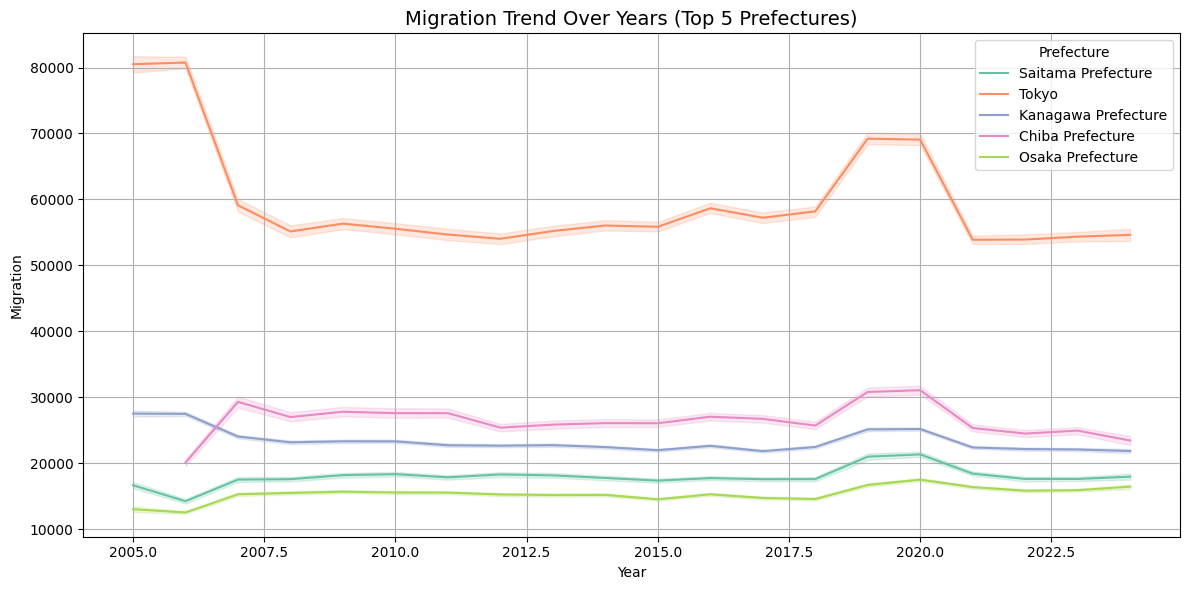

In [53]:
top_prefectures = df_cleaned.groupby('Prefecture')['migration'].sum().nlargest(5).index
df_top = df_cleaned[df_cleaned['Prefecture'].isin(top_prefectures)]

# Lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top, x='Year', y='migration', hue='Prefecture', palette='Set2')
plt.title('Migration Trend Over Years (Top 5 Prefectures)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Migration')
plt.grid(True)
plt.tight_layout()
plt.show()


## 📊 Migration vs Housing Prices

In [54]:
# In this section, we analyze whether regions with higher migration levels also experience higher housing prices.

# We'll compare average migration and price per square meter to identify any patterns.

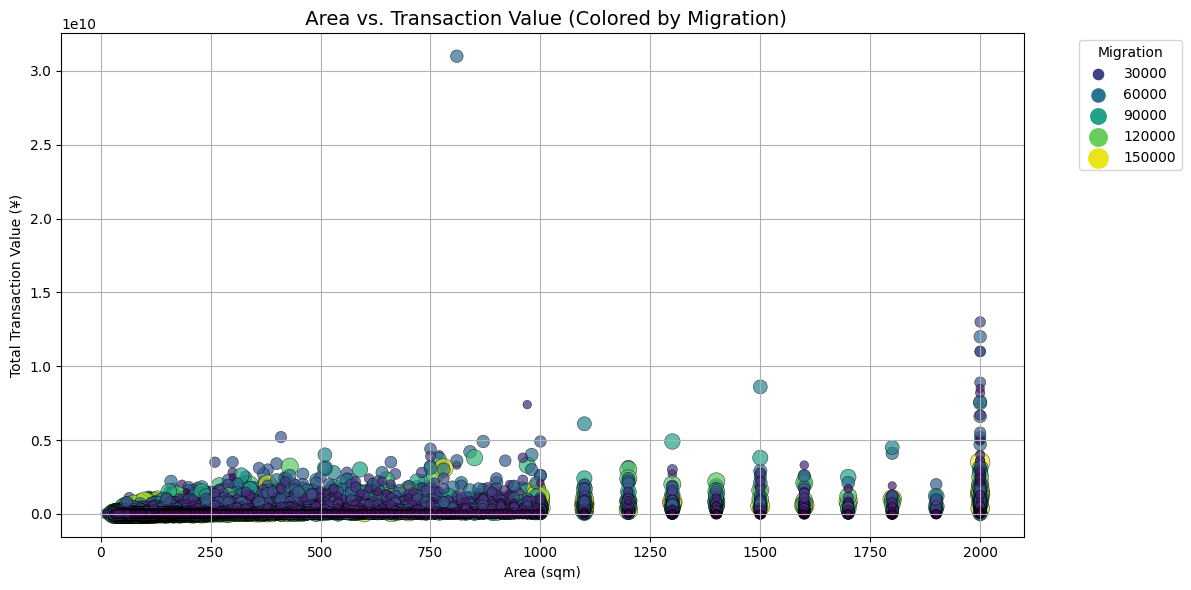

In [55]:

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_cleaned,
    x='Area',
    y='total_transaction_value',
    hue='migration',
    palette='viridis',
    size='migration',
    sizes=(20, 200),
    alpha=0.7,
    edgecolor='black'
)

plt.title(' Area vs. Transaction Value (Colored by Migration)', fontsize=14)
plt.xlabel('Area (sqm)')
plt.ylabel('Total Transaction Value (¥)')
plt.legend(title='Migration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


In [71]:
pivot = df_merged.pivot_table(
    index='Prefecture',
    columns='Year',
    values='Migration',
    aggfunc='sum'
)


# 🔥 Migration Heatmap by Prefecture & Year


In [67]:
#This heatmap visualizes internal migration across Japan’s prefectures over time.

# It reveals:
# Regions with consistent migration flows
# Years with noticeable increases or drops
# Potential urbanization or population shifts

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


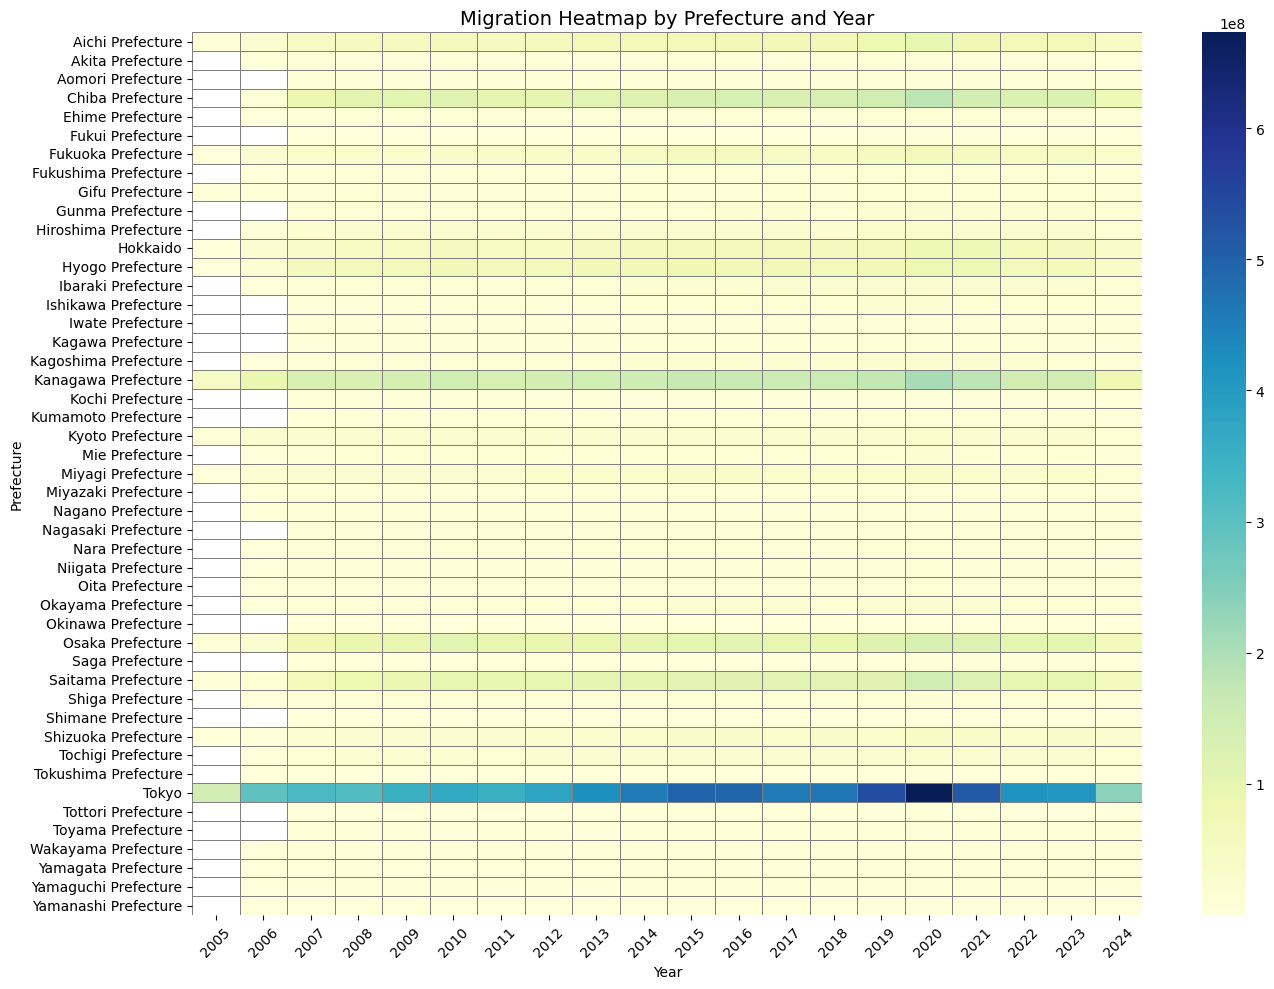

In [68]:
plt.figure(figsize=(14, 10))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray')

plt.title('Migration Heatmap by Prefecture and Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Prefecture')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  📝 Key Insights

- Tokyo has the highest number of building records, suggesting strong urban development.
- Migration rates appear to increase post-2020 in major urban centers.
- Some rural prefectures show population decline, indicating possible urban migration trends.

# ✅ Conclusion

This analysis provides initial indicators of regional urbanization and migration. Future work could involve prediction modeling or integration with socioeconomic indicators (income, employment, etc.) to provide deeper insight.
